 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
# YOUR CODE HERE
whale = pd.read_csv('whale_returns.csv',index_col= 'Date', parse_dates= True)
whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
# YOUR CODE HERE
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls

# YOUR CODE HERE
whale.dropna(inplace = True)
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
# YOUR CODE HERE
algo = pd.read_csv('algo_returns.csv',index_col= 'Date', parse_dates= True)
algo.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
# YOUR CODE HERE
algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
# YOUR CODE HERE
algo.dropna(inplace = True)
algo.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
# YOUR CODE HERE
sp500 = pd.read_csv('sp500_history.csv',index_col= 'Date',parse_dates=True)
sp500.sort_index(inplace = True)
sp500.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [11]:
# Check Data Types
# YOUR CODE HERE
sp500.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
# YOUR CODE HERE
def convert_float(var):
    new = var.replace("$","")
    return float(new)
sp500.Close = sp500.Close.apply(convert_float)
sp500.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500['daily_return'] = sp500.Close.pct_change()
sp500.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [15]:
# Drop nulls
# YOUR CODE HERE
sp500.dropna(inplace = True)
sp500.head()

,Close,daily_return
Date,,
2012-10-02,1445.75,0.000872
2012-10-03,1450.99,0.003624
2012-10-04,1461.40,0.007174
2012-10-05,1460.93,-0.000322
2012-10-08,1455.88,-0.003457


In [16]:
# Rename Column
# YOUR CODE HERE
sp500.columns = ['Close', 'S&P 500']
sp500.drop(columns = 'Close',inplace = True)
sp500.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
data = pd.concat([whale,algo,sp500],join='inner',axis= 1 )
data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

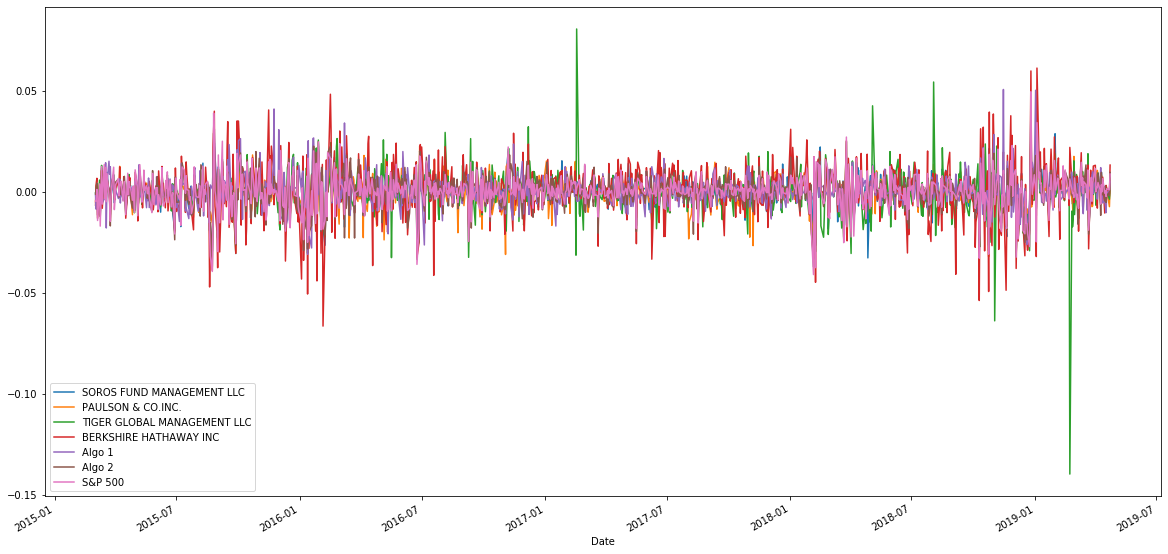

In [18]:
# Plot daily returns
# YOUR CODE HERE
data.plot(figsize=(20,10))

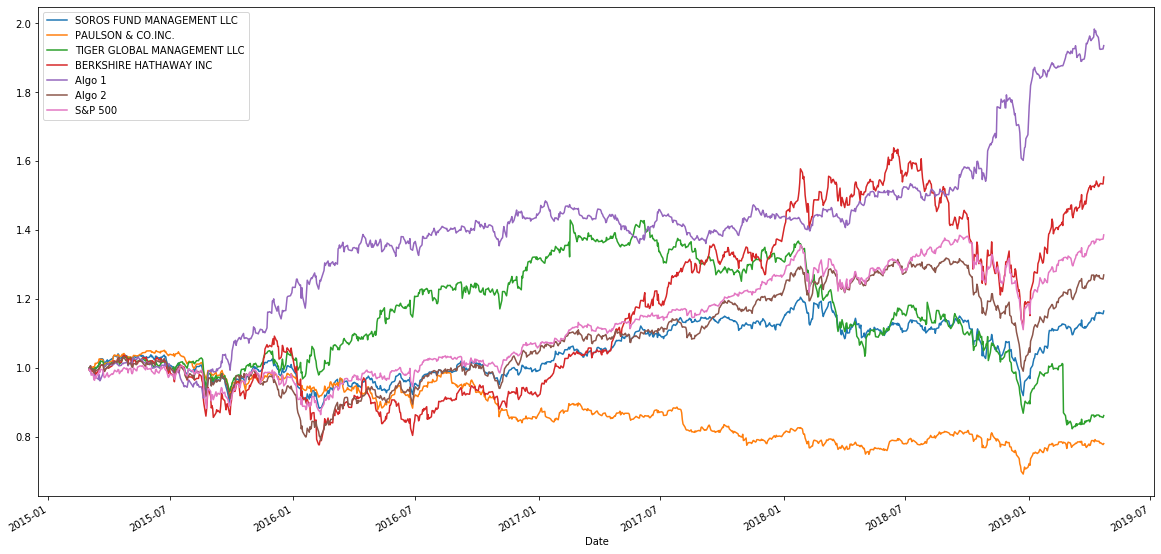

In [19]:
# Plot cumulative returns
# YOUR CODE HERE
(data+1).cumprod().plot(figsize=(20,10))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

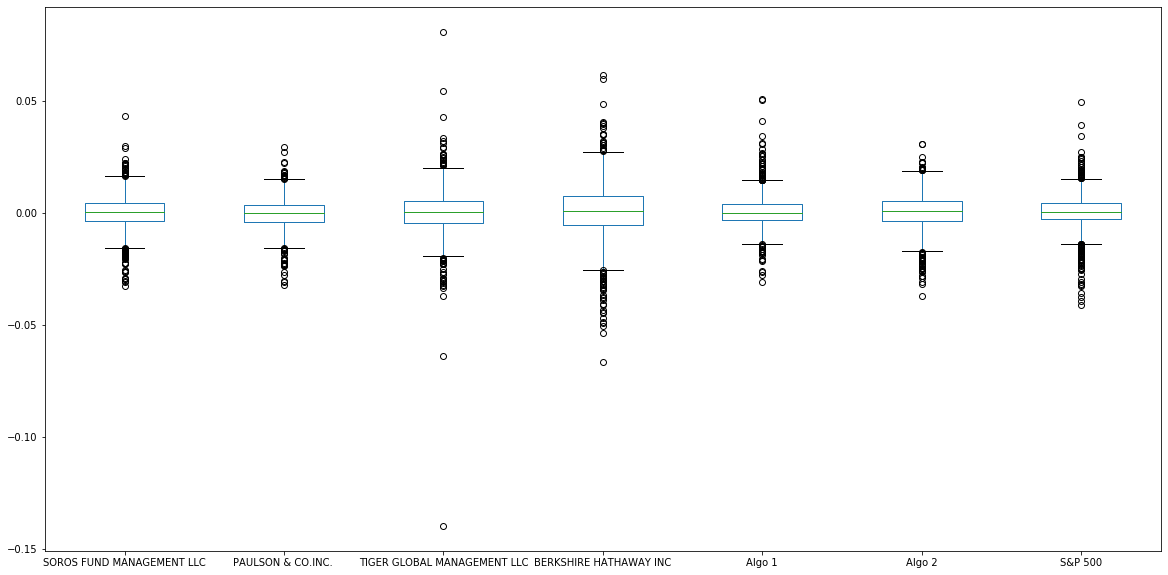

In [20]:
# Box plot to visually show risk
# YOUR CODE HERE
data.plot(kind  = 'box',figsize = (20,10))

In [21]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
data.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [22]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
data.std() > data['S&P 500'].std()

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

## Based on the standard deviation, TIGER GLOBAL MANAGEMENT LLC  and BERKSHIRE HATHAWAY INC  are riskier than S&P 500. 

In [21]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

In [22]:
data.std()*np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

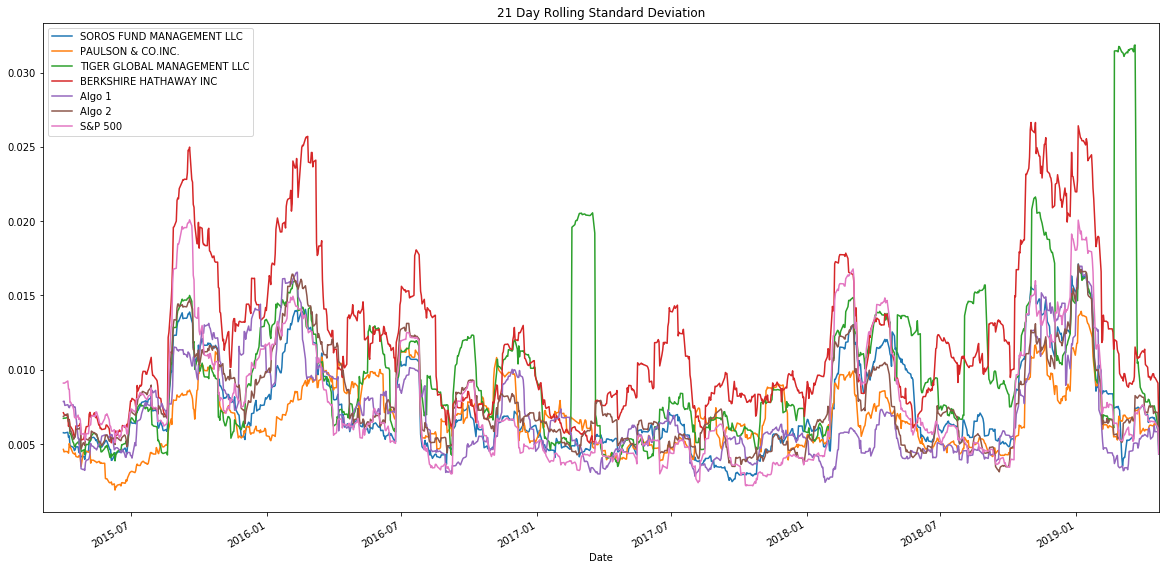

In [22]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
data.rolling(window=21).std().plot(figsize = (20,10))

In [23]:
# Construct a correlation table
# YOUR CODE HERE
data.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


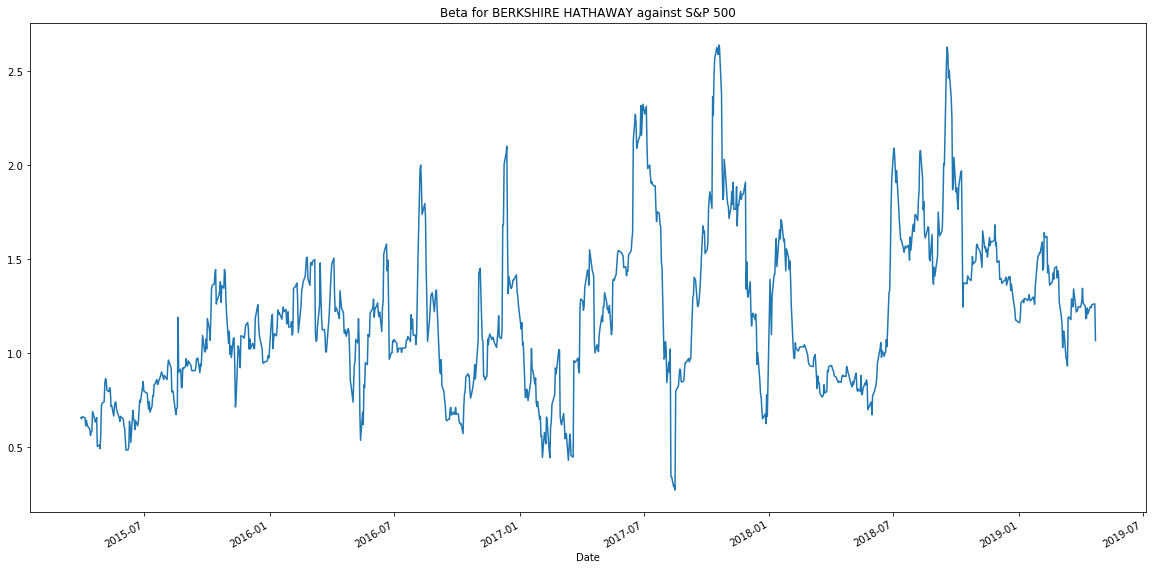

In [24]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
rolling_cov = data['BERKSHIRE HATHAWAY INC'].rolling(window = 21).cov(data["S&P 500"])
rolling_var = data["S&P 500"].rolling(window = 21).var()
beta = rolling_cov/rolling_var
beta.plot(figsize = (20,10),title = "Beta for BERKSHIRE HATHAWAY against S&P 500")

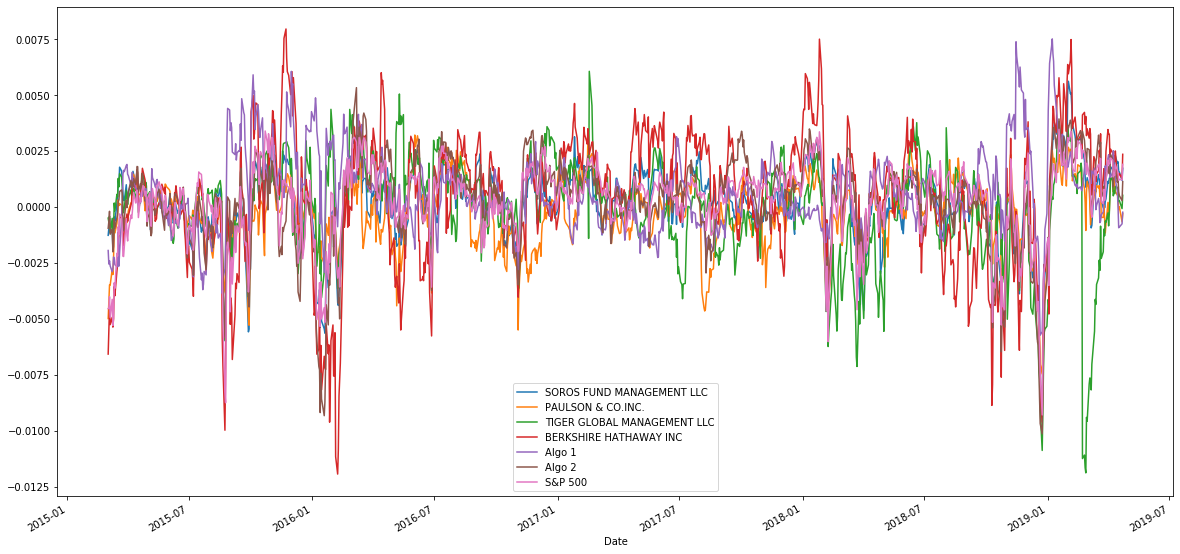

In [25]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
data.ewm(span= 21, adjust= False).mean().plot(figsize = (20,10))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [26]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (data.mean() * 252) / (data.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

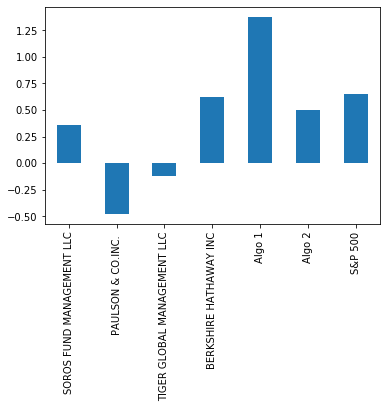

In [27]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind = 'bar')

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [31]:
# Read the first stock
# YOUR CODE HERE
goog = pd.read_csv('Goog.csv',index_col= "Date",parse_dates=True)
goog.head()

,Close
Date,
2015-01-02,523.37
2015-01-05,512.46
2015-01-06,500.59
2015-01-07,499.73
2015-01-08,501.30


In [32]:
# Read the second stock
# YOUR CODE HERE
aapl = pd.read_csv('Aapl.csv',index_col= "Date",parse_dates=True)
aapl.head()

,Close
Date,
2015-01-02,109.33
2015-01-05,106.25
2015-01-06,106.26
2015-01-07,107.75
2015-01-08,111.89


In [33]:
# Read the third stock
# YOUR CODE HERE
cost = pd.read_csv('Cost.csv',index_col= "Date",parse_dates=True)
cost.head()

,Close
Date,
2015-01-02,141.61
2015-01-05,140.00
2015-01-06,141.85
2015-01-07,144.32
2015-01-08,145.56


In [34]:
# Concatenate all stocks into a single DataFrame
df = pd.concat([goog,aapl,cost],join='inner',axis= 1)
df.columns = ["goog","aapl","cost"]
df.head()
df.isnull().sum()
df = df.pct_change()
df.dropna(inplace = True)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
port = df.dot(weights)
port.head()

Date
2015-01-05   -0.020129
2015-01-06   -0.003285
2015-01-07    0.009906
2015-01-08    0.016719
2015-01-09   -0.009088
dtype: float64

In [37]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
new_port = pd.concat([data,port],join = 'inner', axis = 1)
new_port.columns
new_port.rename(columns = {0:"Custome"},inplace = True)
new_port.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custome
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,0.000753
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.002723
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.004679
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.007526
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.004646


In [42]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
new_port.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
Custome                        0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others ##



In [41]:
# Standard Deviation Check
new_port.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
Custome                        0.011233
dtype: float64

## It turns out that our customized portfolio is more risky that S&P 500. The reason is our portfolio containing more IT companies such as Apple and Google, which means less deversification. ##

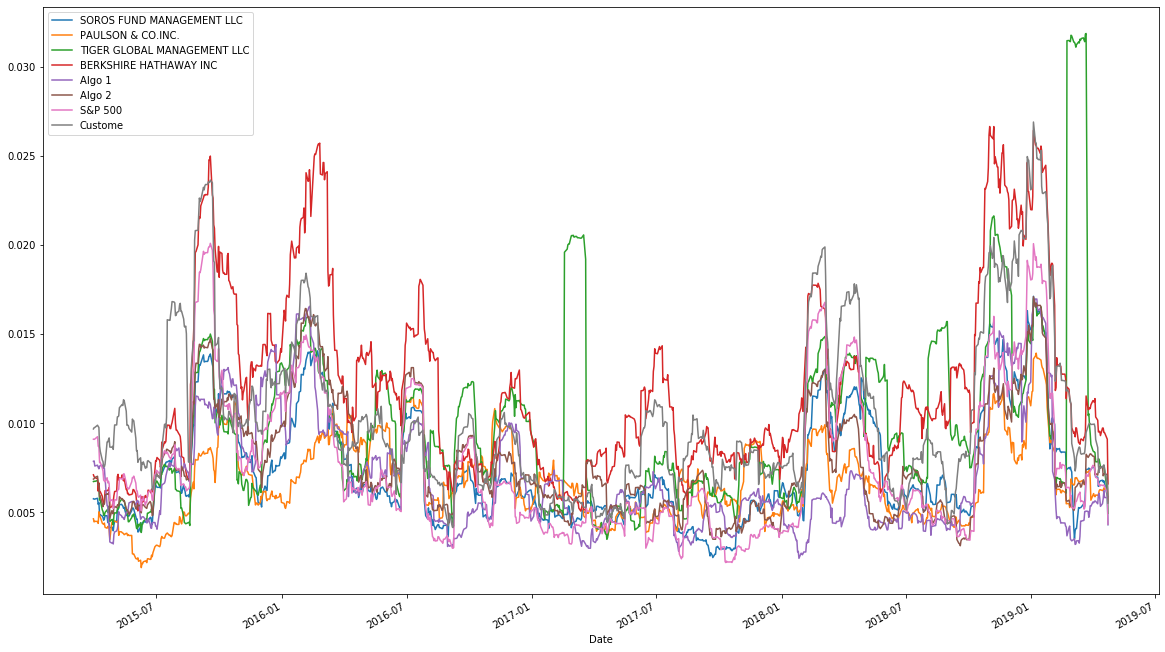

In [71]:
# Rolling on standard deviation 
new_port.rolling(window= 21).std().plot(figsize = (20,12))


In [44]:
# Annualized Sharpe Ratios
sharpe_ratios_new = (new_port.mean() * 252) / (new_port.std() * np.sqrt(252))
sharpe_ratios_new

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
Custome                        0.947543
dtype: float64

## Our portfolio has larger sharpe ratio than S&P 500 ##



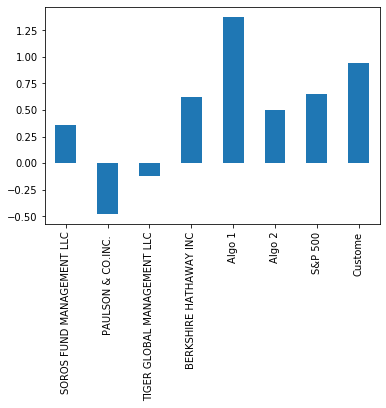

In [45]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_new.plot(kind = 'bar')


In [46]:
# Create a correlation analysis
new_port.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custome
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864,0.647335
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732,0.506079
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946,0.511829
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371,0.674271
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494,0.218171
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764,0.633747
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000,0.807315
Custome,0.647335,0.506079,0.511829,0.674271,0.218171,0.633747,0.807315,1.000000


## Our portfolio has relatively larger correlation among others ##


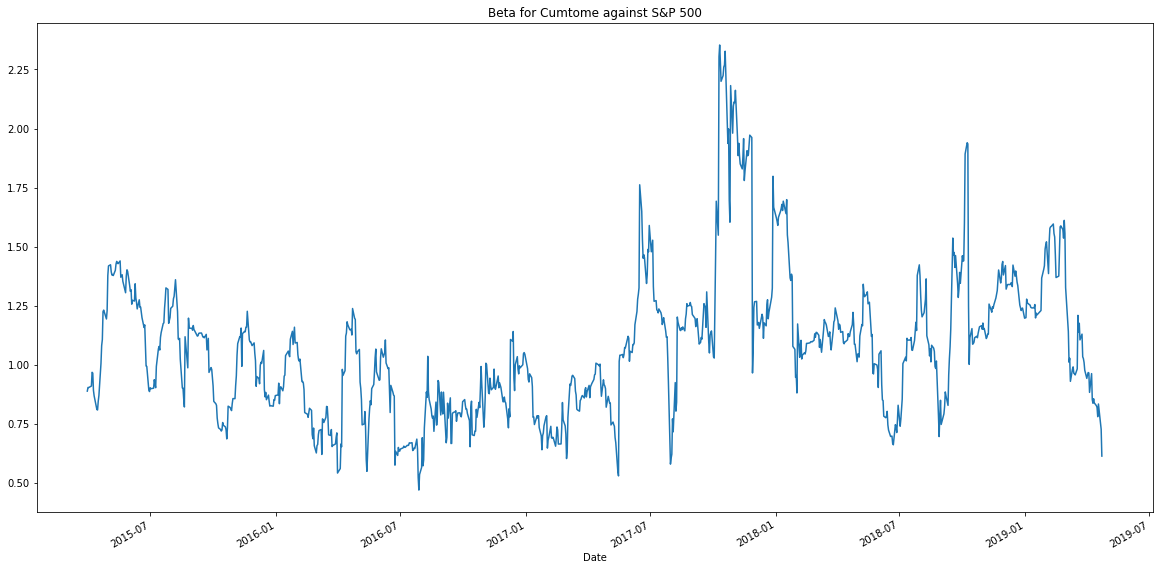

In [75]:
# Plot beta against S&P 500
rolling_cov_new = new_port['Custome'].rolling(window = 21).cov(new_port["S&P 500"])
rolling_var_new = new_port["S&P 500"].rolling(window = 21).var()
beta_new = rolling_cov_new/rolling_var_new
beta_new.plot(figsize = (20,10),title = "Beta for Cumtome against S&P 500")

### To sum up, the customized portfolio has larger standard deviation which means has more risk. However, the sharpe ratio is higher than most of other stocks, indicating that IT companies really make lots of money in the past two years. In addition, the correlation tells us that our portfolio has less diversification, leading to potential loss in the future when market behaves badly. 